# Caroline Barte
# DSC 680 Milestone 3

## Imports

In [1]:
import pandas as pd

In [2]:
file_name = 'ThrowbackDataThursday Week 11 - Film Genre Stats.csv'
df = pd.read_csv(file_name)
print(df.head())

   index      Genre  Year  Movies Released       Gross  Tickets Sold  \
0      0  Adventure  1995               29   771507571     177358047   
1      1  Adventure  1996               34  1290490033     291966054   
2      2  Adventure  1997               23   881902843     192135684   
3      3  Adventure  1998               29  1614467732     344236174   
4      4  Adventure  1999               27  1612432107     317407880   

   Inflation-Adjusted Gross                            Top Movie  \
0                1590901682                            Toy Story   
1                2618935504                     Independence Day   
2                1723457085                         Men in Black   
3                3087798481                           Armageddon   
4                2847148684  Star Wars Ep. I: The Phantom Menace   

   Top Movie Gross (That Year)  Top Movie Inflation-Adjusted Gross (That Year)  
0                    150148222                                    3.096160e+0

## Initial Analysis

In [3]:
df.columns

Index(['index', 'Genre', 'Year', 'Movies Released', 'Gross', 'Tickets Sold',
       'Inflation-Adjusted Gross', 'Top Movie', 'Top Movie Gross (That Year)',
       'Top Movie Inflation-Adjusted Gross (That Year)'],
      dtype='object')

In [4]:
df = df.drop('index', axis=1)

In [16]:
genre_revenue = df.groupby('Genre')['Gross'].sum().sort_values(ascending=False)

sorted_genres = genre_revenue.index.tolist()

print("Genres sorted by most revenue:")
print(sorted_genres)

Genres sorted by most revenue:
['Adventure', 'Action', 'Drama', 'Comedy', 'Thriller or Suspense', 'Horror', 'Romantic Comedy', 'Musical', 'Documentary', 'Dark Comedy', 'Western', 'Concert or Performance', 'Multiple Genres', 'Reality']


## Correlation Matrix

In [15]:
numerical_columns = ['Movies Released', 'Gross', 'Tickets Sold', 
                     'Inflation-Adjusted Gross', 'Top Movie Gross (That Year)', 
                     'Top Movie Inflation-Adjusted Gross (That Year)']

correlation_matrix = df[numerical_columns].corr()

In [12]:
correlation_matrix

,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
Movies Released,1.000000,0.412978,0.401281,0.401281,0.235386,0.210184
Gross,0.412978,1.000000,0.955279,0.955279,0.857945,0.809520
Tickets Sold,0.401281,0.955279,1.000000,1.000000,0.802512,0.843960
Inflation-Adjusted Gross,0.401281,0.955279,1.000000,1.000000,0.802512,0.843960
Top Movie Gross (That Year),0.235386,0.857945,0.802512,0.802512,1.000000,0.945117
Top Movie Inflation-Adjusted Gross (That Year),0.210184,0.809520,0.843960,0.843960,0.945117,1.000000


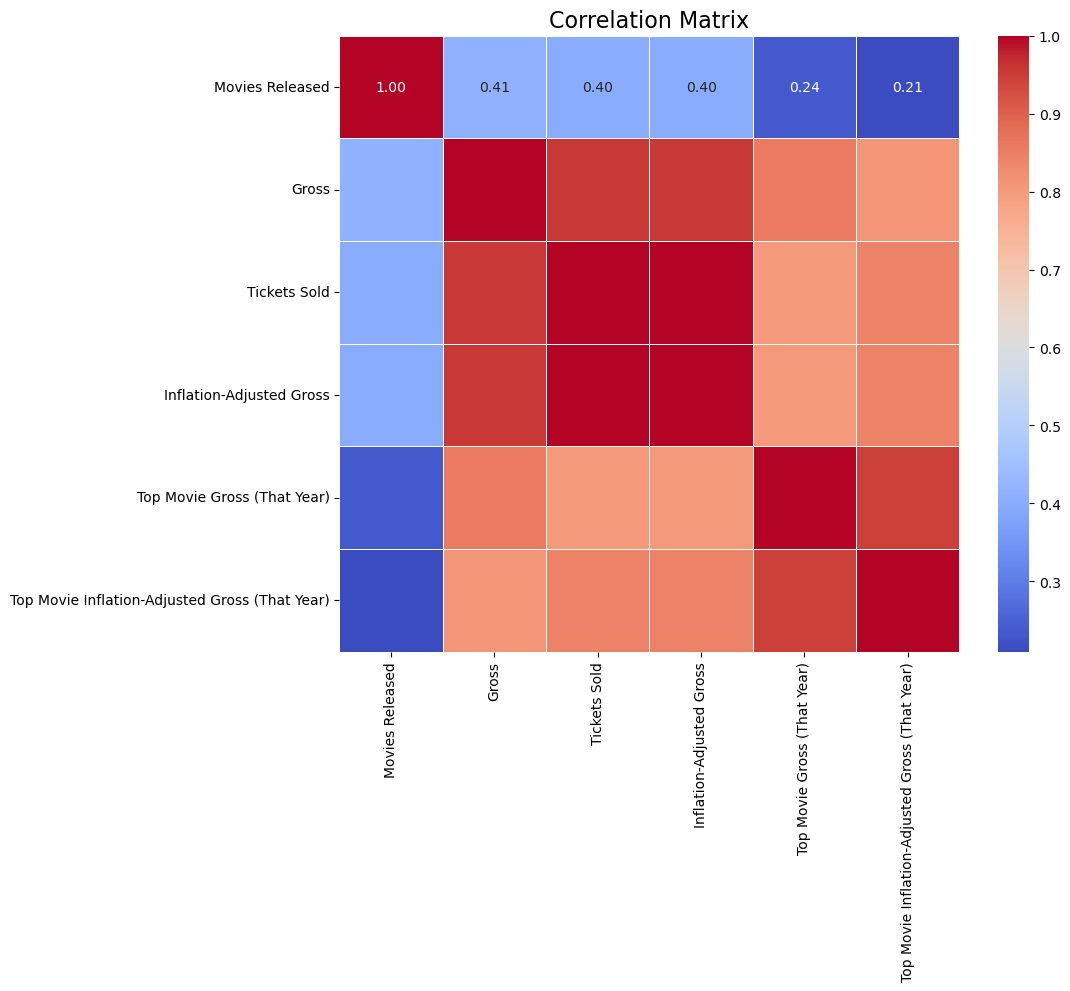

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

## Visualizations

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

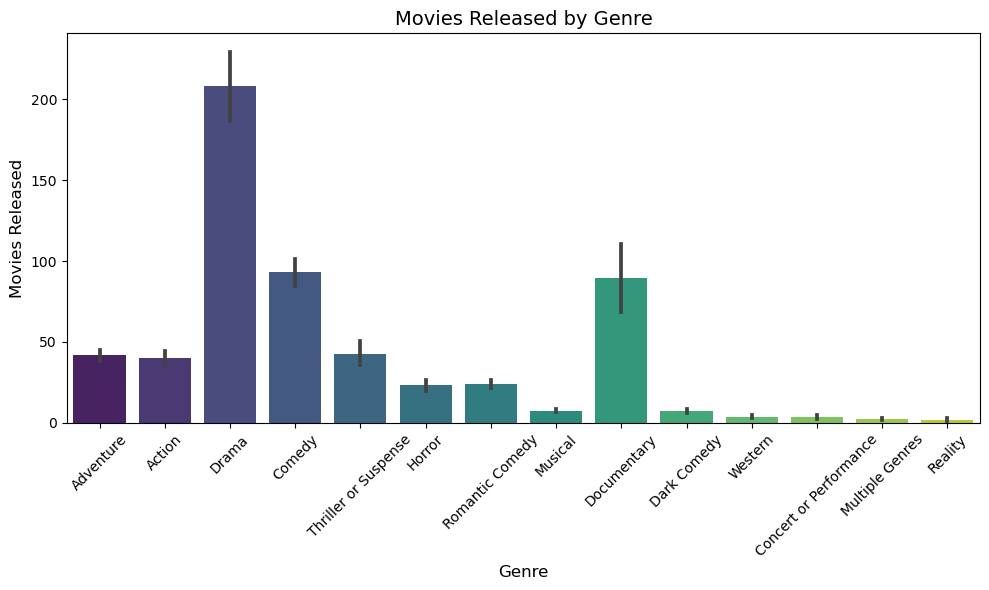

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Genre', y='Movies Released', palette='viridis')
plt.title('Movies Released by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Movies Released', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


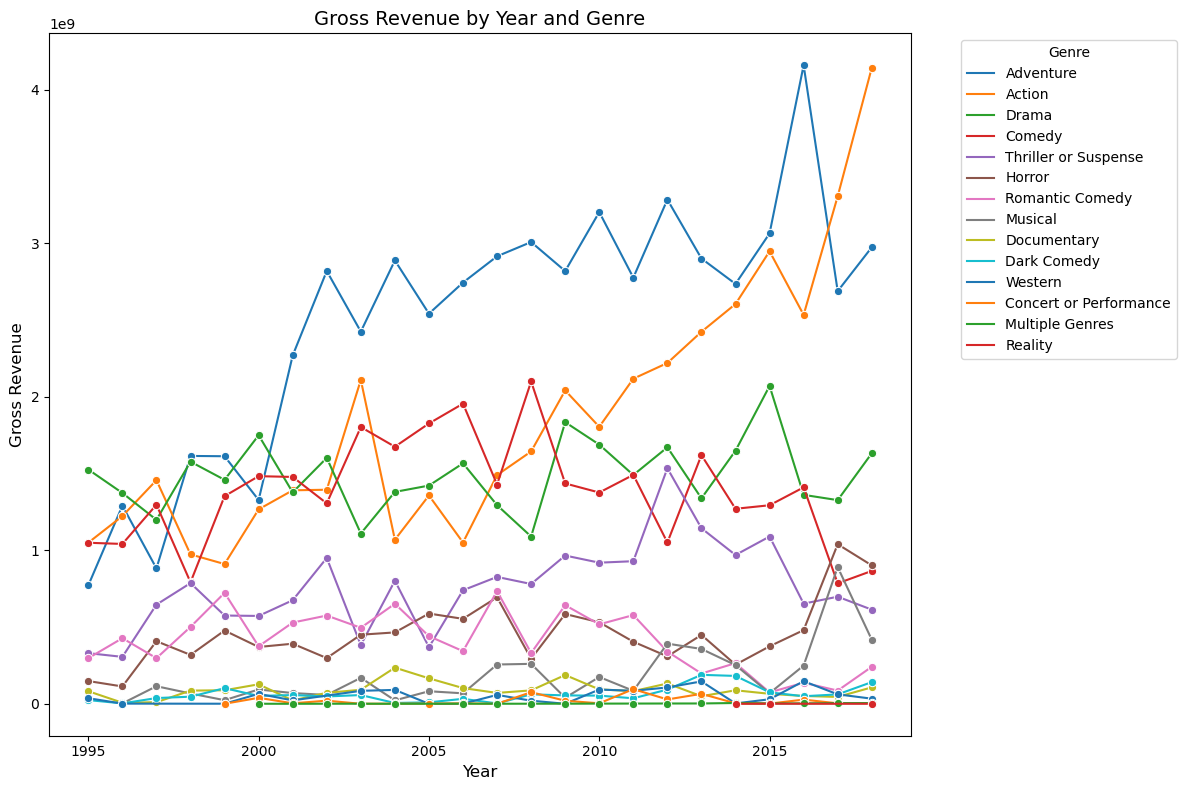

In [7]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Gross', hue='Genre', marker='o', palette='tab10')
plt.title('Gross Revenue by Year and Genre', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Gross Revenue', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

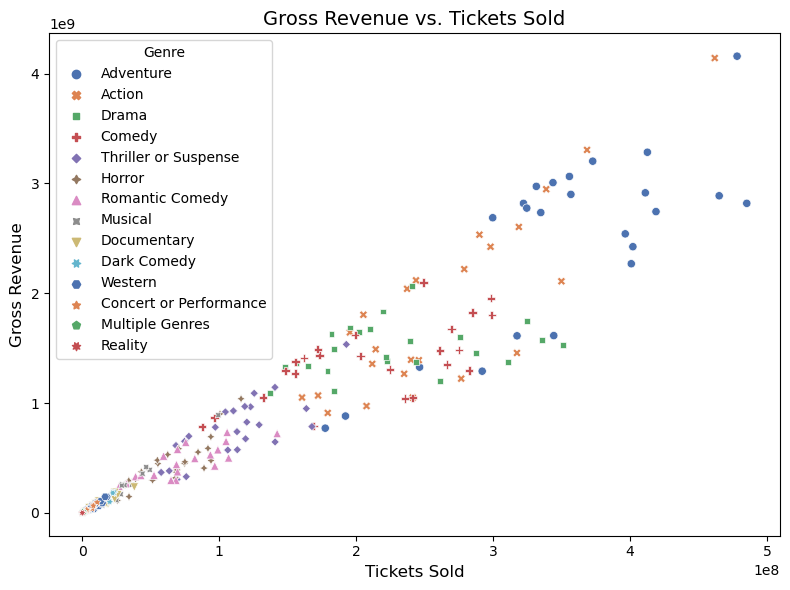

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Tickets Sold', y='Gross', hue='Genre', style='Genre', palette='deep')
plt.title('Gross Revenue vs. Tickets Sold', fontsize=14)
plt.xlabel('Tickets Sold', fontsize=12)
plt.ylabel('Gross Revenue', fontsize=12)
plt.tight_layout()
plt.show()

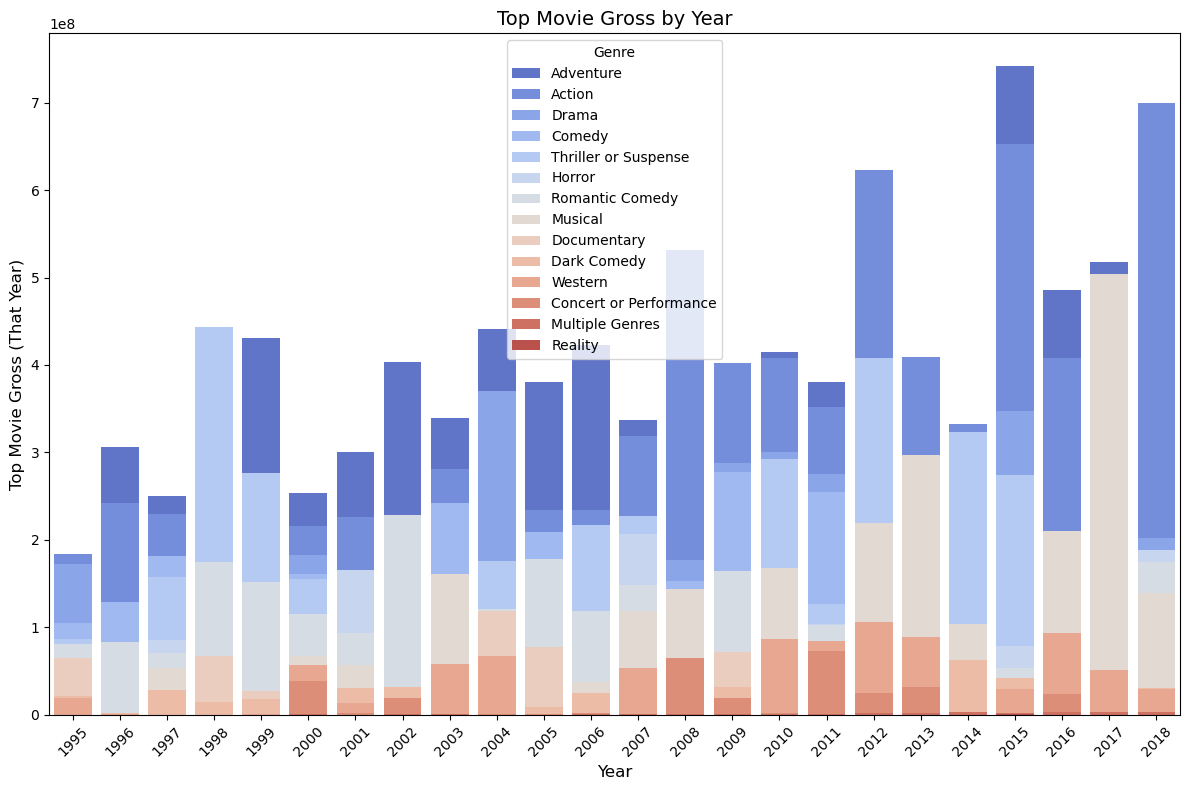

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Year', y='Top Movie Gross (That Year)', hue='Genre', dodge=False, palette='coolwarm')
plt.title('Top Movie Gross by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Top Movie Gross (That Year)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()